In [2]:
from datetime import datetime, timedelta

from tqdm import tqdm
from pytz import timezone
############################## create api 

from alpaca_trade_api.rest import REST, TimeFrame
from alpaca_trade_api.stream import Stream
import alpaca_trade_api as tradeapi

import numpy as np

from TradingBot.strategy.backtest import RollingBackTest, APISettings, BackTest, BackTest_Doublemomentum, RollingBackTest_DoubleMomentum
import matplotlib.pyplot as plt


In [3]:
nyc = timezone('America/New_York')
now = datetime.today().astimezone(nyc)
today_str = datetime.today()+ timedelta(1)
today_str = today_str.astimezone(nyc).strftime('%Y-%m-%d') 
print("the end day of data:", today_str)

the end day of data: 2022-10-18


In [3]:
class APISettings:
    API_KEY_ID = "your"
    SECRET_KEY = "your"
    ENDPOINT = 'https://paper-api.alpaca.markets'

# Rolling test

## 1min 15min

In [9]:
# long_data_period = 500
short_data_before = 29

testing_length = 5
gap = 1
shorterm_interval = '1m'
longterm_interval = '1h'


#long_days_before = datetime.today() - timedelta(long_data_period) 
short_days_before = datetime.today() - timedelta(short_data_before) 

#long_data_start_date = long_days_before.astimezone(nyc).strftime('%Y-%m-%d')
short_data_start_date = short_days_before.astimezone(nyc).strftime('%Y-%m-%d')

In [8]:
class Short_Momentum_Settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 5
    long_sell_thres = 5
    short_buy_thres = 10
    short_sell_thres = 10
    ema_smooth_factor = 20 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    dif_smooth_factor = 2 # price smooth factor for computing momentum

class Long_Momentum_settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 10
    long_sell_thres = 10
    short_buy_thres = 10
    short_sell_thres = 10
    ema_smooth_factor = 20 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    dif_smooth_factor = 2 # price smooth factor for computing momentum


rollingbacktest = RollingBackTest_DoubleMomentum(
    APISettings(),
    Short_Momentum_Settings(), Long_Momentum_settings(),
    short_data_start_date, testing_length, gap, shorterm_interval, longterm_interval,
    '^IXIC', 'TQQQ', 'SQQQ',
    False
)

#print(rollingbacktest.total_rets, '\n')

#print(rollingbacktest.rets_noncomp, '\n')

print(np.mean(rollingbacktest.total_rets), '\n')

print(np.mean(rollingbacktest.rets_noncomp), '\n')



start testing...


100%|██████████| 17/17 [00:21<00:00,  1.27s/it]

1.026981068844064 

1.000008974708999 



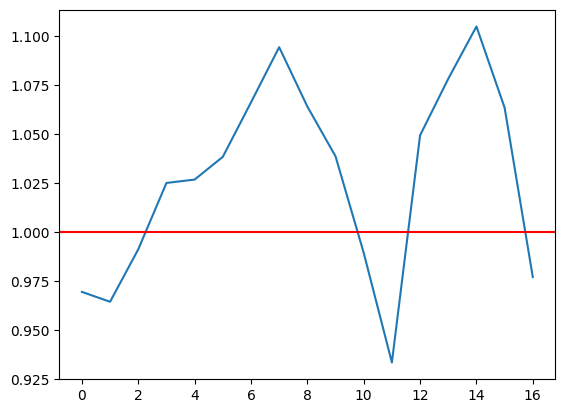

In [6]:
plt.plot(rollingbacktest.total_rets)
plt.axhline(y=1, color='r', linestyle='-')

In [6]:
# long_data_period = 500
short_data_before = 500

testing_length = 50
gap = 10
shorterm_interval = '1h'
longterm_interval = '1d'


#long_days_before = datetime.today() - timedelta(long_data_period) 
short_days_before = datetime.today() - timedelta(short_data_before) 

#long_data_start_date = long_days_before.astimezone(nyc).strftime('%Y-%m-%d')
short_data_start_date = short_days_before.astimezone(nyc).strftime('%Y-%m-%d')

In [11]:
class Short_Momentum_Settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 10
    long_sell_thres = 10
    short_buy_thres = 10
    short_sell_thres = 10
    ema_smooth_factor = 20 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    dif_smooth_factor = 3 # price smooth factor for computing momentum

class Long_Momentum_settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 10
    long_sell_thres = 10
    short_buy_thres = 10
    short_sell_thres = 10
    ema_smooth_factor = 20 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    dif_smooth_factor = 2 # price smooth factor for computing momentum


rollingbacktest = RollingBackTest_DoubleMomentum(
    APISettings(),
    Short_Momentum_Settings(), Long_Momentum_settings(),
    short_data_start_date, testing_length, gap, shorterm_interval, longterm_interval,
    '^IXIC', 'TQQQ', 'SQQQ',
    False
)

print(rollingbacktest.total_rets, '\n')

print(rollingbacktest.rets_noncomp, '\n')

print(np.mean(rollingbacktest.total_rets), '\n')

print(np.mean(rollingbacktest.rets_noncomp), '\n')

plt.plot(rollingbacktest.total_rets)

start testing...


100%|██████████| 31/31 [00:13<00:00,  2.26it/s]


[1.0031990464746443, 1.0640399607343207, 1.0937080677988844, 1.0785517603709125, 1.0859483841878255, 1.0296166295669924, 1.0230782226720274, 0.9768165385985421, 1.029049615844164, 1.1250638557678878, 1.0286357762838931, 0.8304107720171232, 0.7270555825128301, 0.8259825344379145, 1.1746493141842203, 1.1683567738215574, 1.1867180743513823, 1.058400388931998, 0.9446637137788461, 1.0587026627374585, 0.9407406954390792, 1.1114301799843376, 1.135976784213519, 1.0368299586034555, 0.8743056365419668, 0.7551839548099856, 0.771121804661255, 0.933552930418793, 1.1481095996234296, 1.1482249910099187, 1.1853580729102524] 

[1.0000106091394176, 1.0001308062885337, 1.000186600125327, 1.0001576173533429, 1.0001693299867749, 1.0000639824970738, 1.00005481829355, 0.9999647206303268, 1.000069813857639, 1.0002463948511493, 1.0000651725645122, 0.9996287413814637, 0.99935893171821, 0.9996136429972454, 1.00036525600291, 1.000373149649034, 1.000416527820605, 1.0001939446118724, 0.9999511812848589, 1.000171369

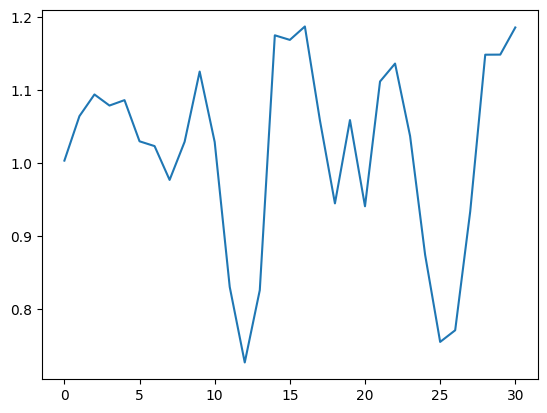

In [12]:
print(rollingbacktest.total_rets, '\n')

print(rollingbacktest.rets_noncomp, '\n')

print(np.mean(rollingbacktest.total_rets), '\n')

print(np.mean(rollingbacktest.rets_noncomp), '\n')

plt.plot(rollingbacktest.total_rets)

# Non rolling test

## short=1min, long=1h

In [4]:
long_data_period = 30
short_data_period = 6


long_days_before = datetime.today() - timedelta(long_data_period) 
short_days_before = datetime.today() - timedelta(short_data_period) 

long_data_start_date = long_days_before.astimezone(nyc).strftime('%Y-%m-%d')
short_data_start_date = short_days_before.astimezone(nyc).strftime('%Y-%m-%d')

0.5256673511293635 0.5304659498207885 0.5192307692307693
1.1792512386637366 1.0868228434254577 1.0850445827463124


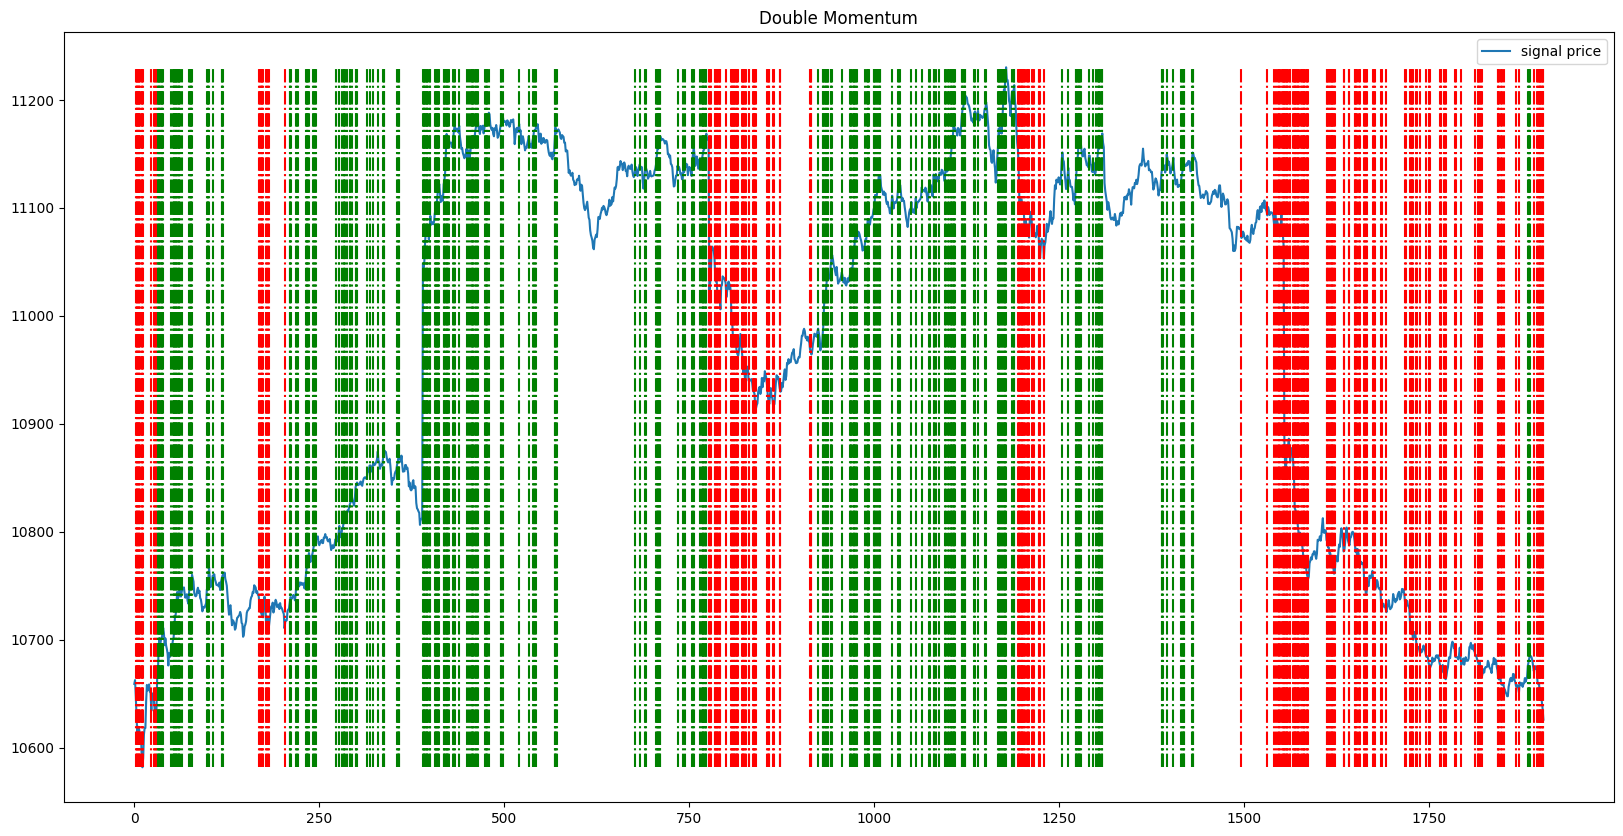

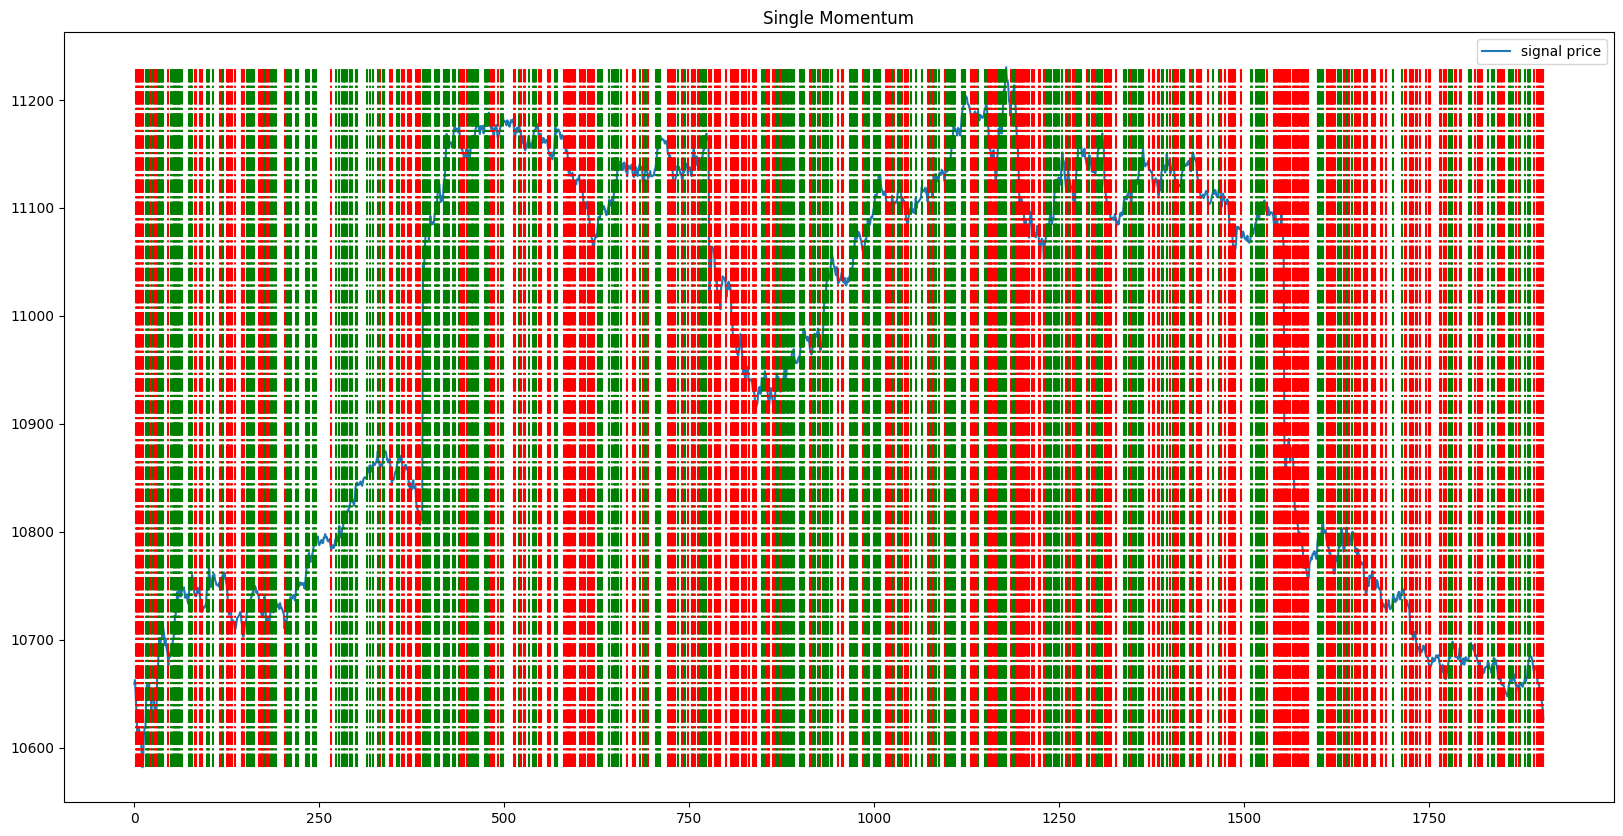

In [6]:
class Short_Momentum_Settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 2
    long_sell_thres = 2
    short_buy_thres = 2
    short_sell_thres = 2
    ema_smooth_factor = 20 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    dif_smooth_factor = 4 # price smooth factor for computing momentum

class Long_Momentum_settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 0
    long_sell_thres = 0
    short_buy_thres = 0
    short_sell_thres = 0
    ema_smooth_factor = 10 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    dif_smooth_factor = 4 # price smooth factor for computing momentum




back_test = BackTest_Doublemomentum(
    Short_Momentum_Settings(),
    Long_Momentum_settings(),
    short_data_start_date,
    long_data_start_date,
    today_str,
    '^IXIC',
    'TQQQ',
    'SQQQ',
    '1m',
    '1h',
    
)

print(back_test.total_suc, back_test.long_suc, back_test.short_suc)
print(back_test.return_total, back_test.return_short, back_test.return_long)

## short=1min, long=1d

In [7]:
long_data_period = 100
short_data_period = 6


long_days_before = datetime.today() - timedelta(long_data_period) 
short_days_before = datetime.today() - timedelta(short_data_period) 

long_data_start_date = long_days_before.astimezone(nyc).strftime('%Y-%m-%d')
short_data_start_date = short_days_before.astimezone(nyc).strftime('%Y-%m-%d')

0.505091649694501 0.4968944099378882 0.5207100591715976
1.0554101186059988 1.0268634147667024 1.027799903501073


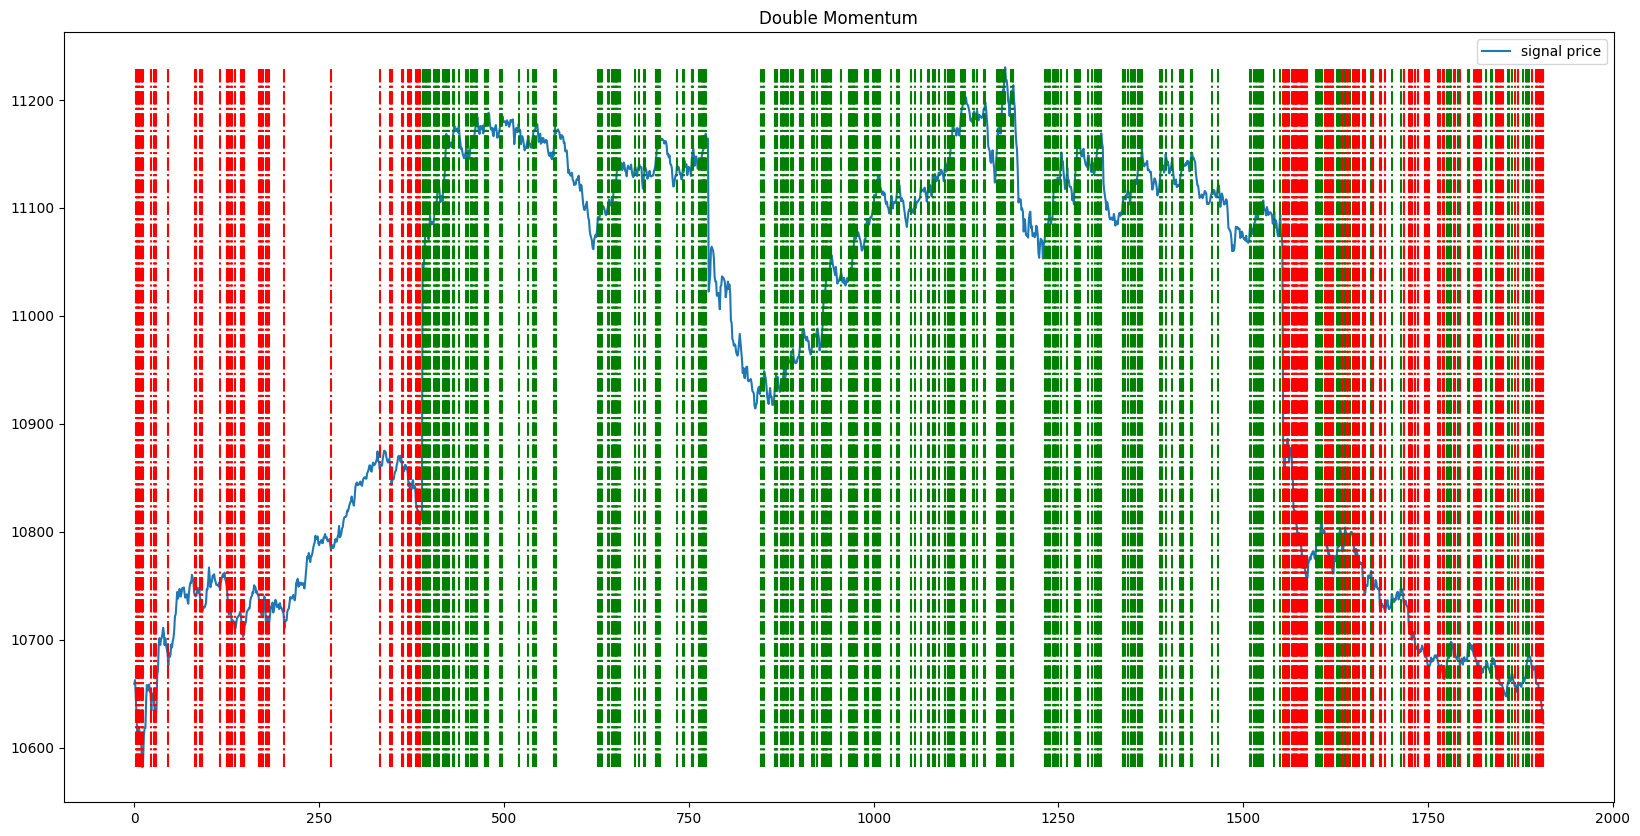

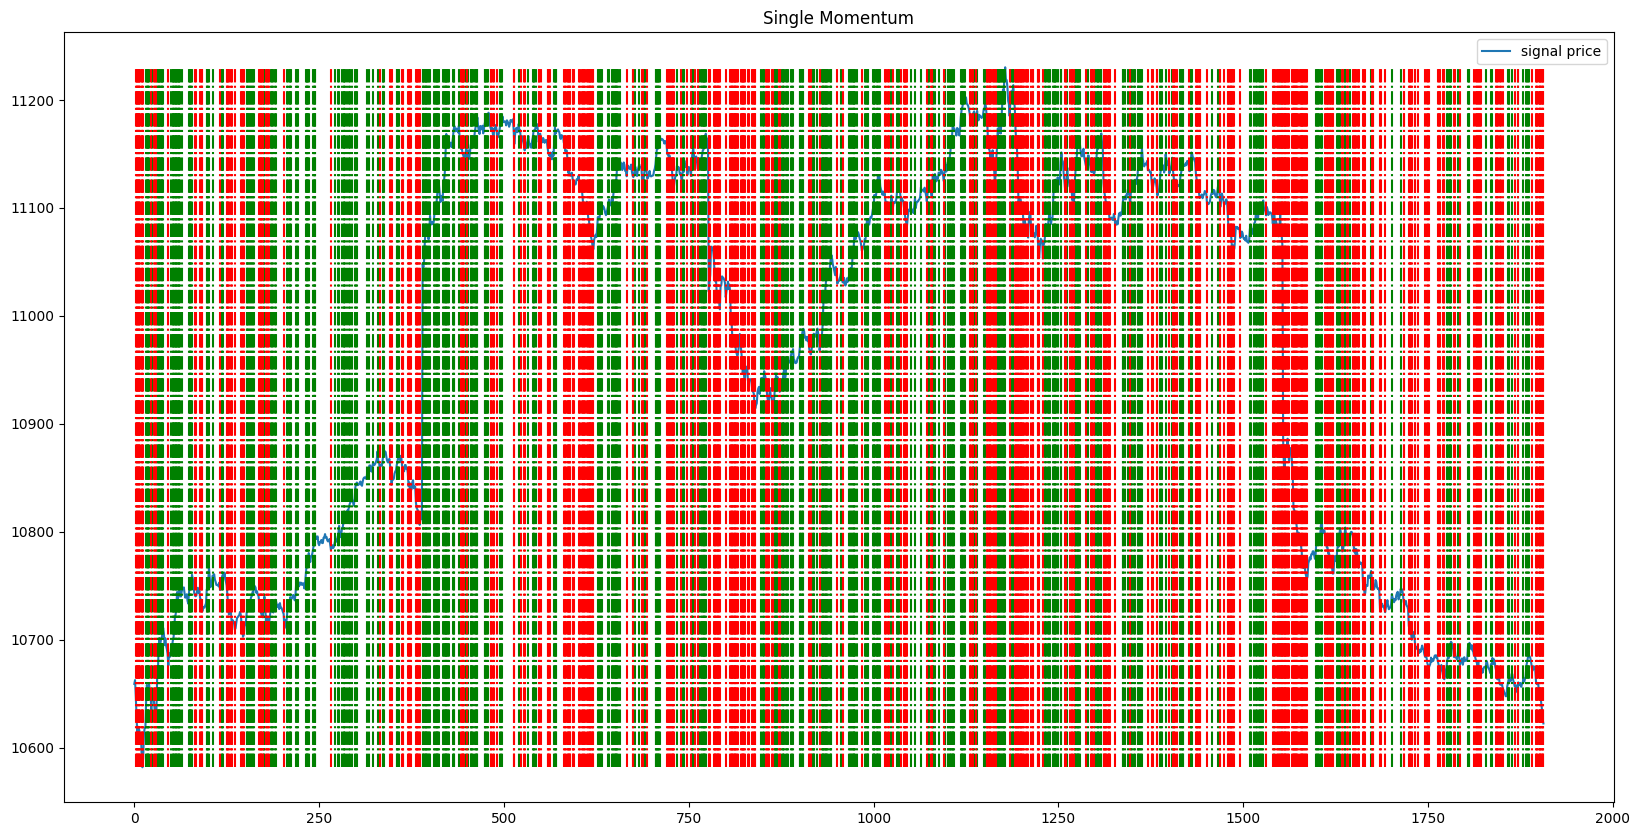

In [10]:
class Short_Momentum_Settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 2
    long_sell_thres = 2
    short_buy_thres = 2
    short_sell_thres = 2
    ema_smooth_factor = 20 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    dif_smooth_factor = 4 # price smooth factor for computing momentum

class Long_Momentum_settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 0
    long_sell_thres = 0
    short_buy_thres = 0
    short_sell_thres = 0
    ema_smooth_factor = 10 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    dif_smooth_factor = 4 # price smooth factor for computing momentum




back_test = BackTest_Doublemomentum(
    Short_Momentum_Settings(),
    Long_Momentum_settings(),
    short_data_start_date,
    long_data_start_date,
    today_str,
    '^IXIC',
    'TQQQ',
    'SQQQ',
    '1m',
    '1d',
    
)

print(back_test.total_suc, back_test.long_suc, back_test.short_suc)
print(back_test.return_total, back_test.return_short, back_test.return_long)

## short=5min, long=1d

In [13]:
long_data_period = 120
short_data_period = 29


long_days_before = datetime.today() - timedelta(long_data_period) 
short_days_before = datetime.today() - timedelta(short_data_period) 

long_data_start_date = long_days_before.astimezone(nyc).strftime('%Y-%m-%d')
short_data_start_date = short_days_before.astimezone(nyc).strftime('%Y-%m-%d')

0.5270655270655271 0.5416666666666666 0.5259938837920489
1.1720149231382853 1.159243378819893 1.0110171380330795


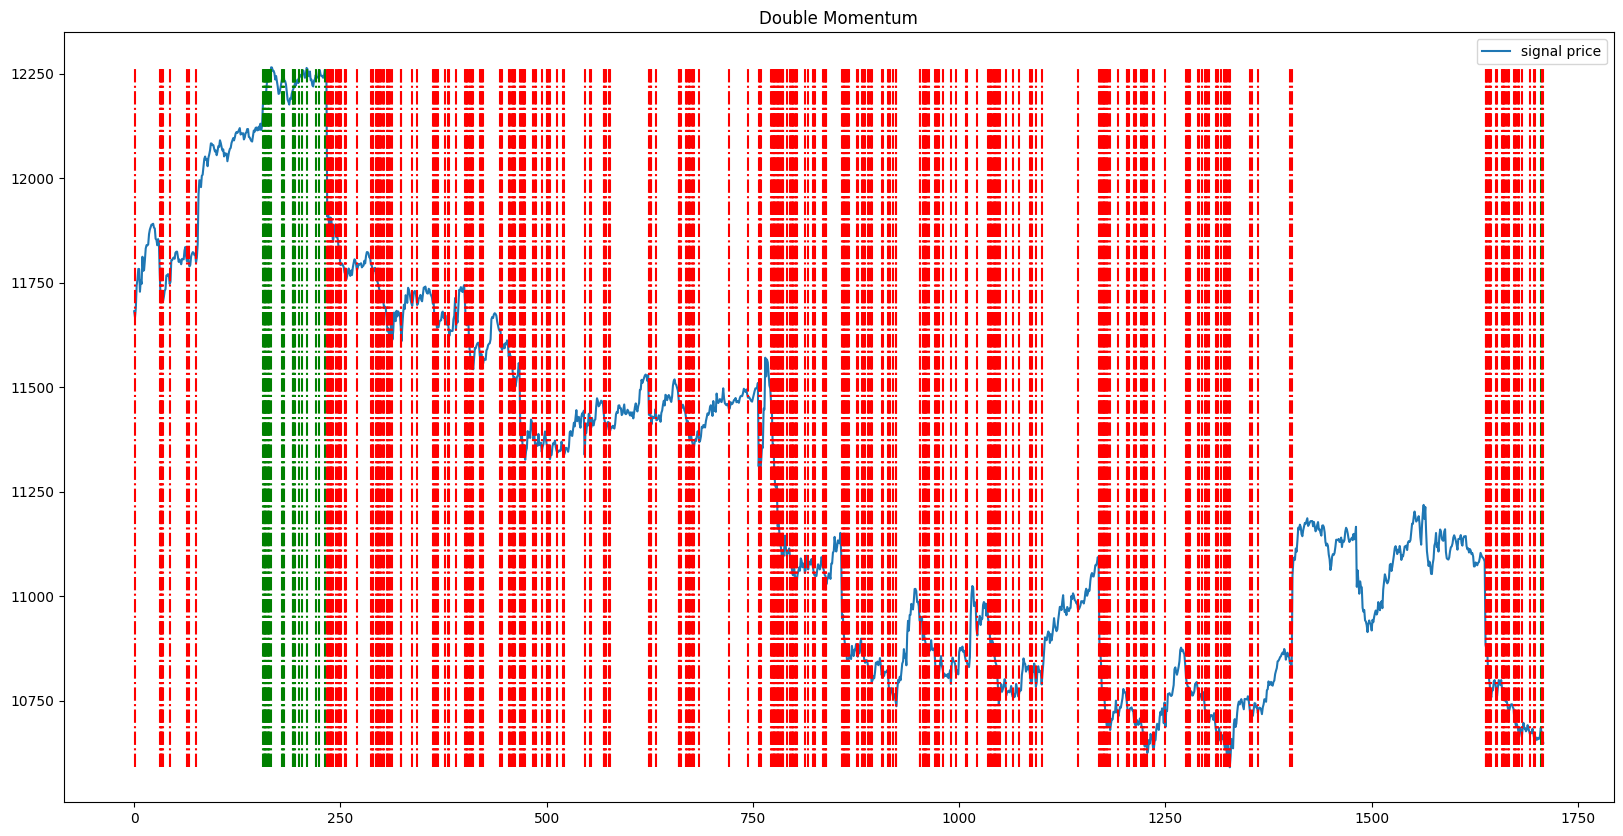

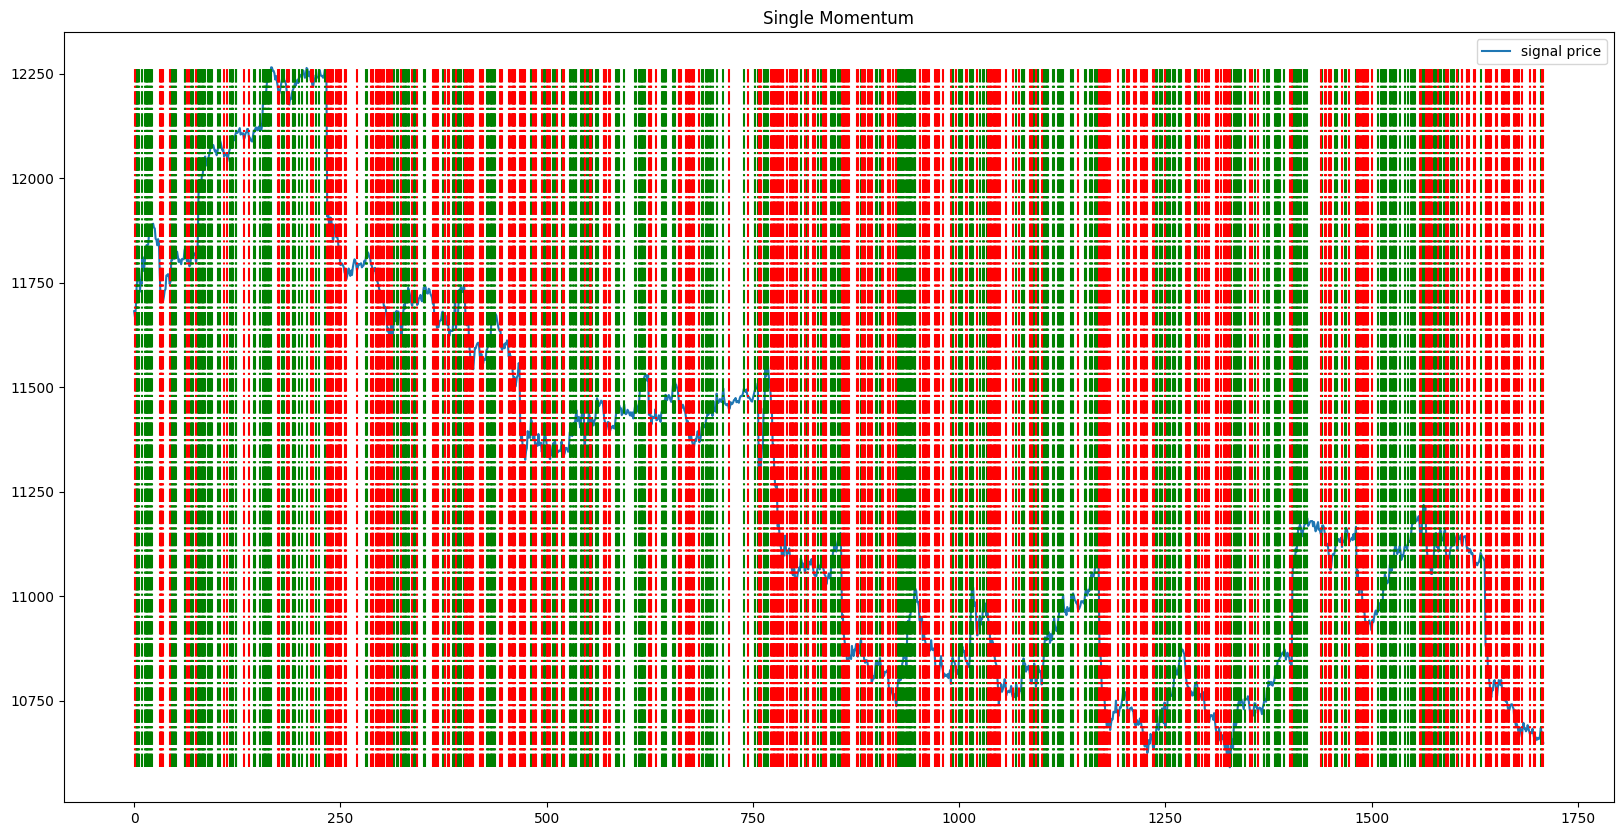

In [17]:
class Short_Momentum_Settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 5
    long_sell_thres = 5
    short_buy_thres = 5
    short_sell_thres = 5
    ema_smooth_factor = 20 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    dif_smooth_factor = 4 # price smooth factor for computing momentum

class Long_Momentum_settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 0
    long_sell_thres = 0
    short_buy_thres = 0
    short_sell_thres = 0
    ema_smooth_factor = 20 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    dif_smooth_factor = 4 # price smooth factor for computing momentum




back_test = BackTest_Doublemomentum(
    Short_Momentum_Settings(),
    Long_Momentum_settings(),
    short_data_start_date,
    long_data_start_date,
    today_str,
    '^IXIC',
    'TQQQ',
    'SQQQ',
    '5m',
    '1d',
    
)

print(back_test.total_suc, back_test.long_suc, back_test.short_suc)
print(back_test.return_total, back_test.return_short, back_test.return_long)

## short=1h, long=1d

In [13]:
long_data_period = 500
short_data_period = 100


long_days_before = datetime.today() - timedelta(long_data_period) 
short_days_before = datetime.today() - timedelta(short_data_period) 

long_data_start_date = long_days_before.astimezone(nyc).strftime('%Y-%m-%d')
short_data_start_date = short_days_before.astimezone(nyc).strftime('%Y-%m-%d')

In [14]:
class Short_Momentum_Settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 10
    long_sell_thres = 10
    short_buy_thres = 10
    short_sell_thres = 10
    ema_smooth_factor = 10 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    dif_smooth_factor = 3 # price smooth factor for computing momentum

class Long_Momentum_settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 10
    long_sell_thres = 10
    short_buy_thres = 10
    short_sell_thres = 10
    ema_smooth_factor = 3 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    dif_smooth_factor = 2 # price smooth factor for computing momentum


back_test = BackTest_Doublemomentum(
    Short_Momentum_Settings(),
    Long_Momentum_settings(),
    short_data_start_date,
    long_data_start_date,
    today_str,
    '^IXIC',
    'TQQQ',
    'SQQQ',
    '1h',
    '1d',
    
)

print(back_test.total_suc, back_test.long_suc, back_test.short_suc)
print(back_test.return_total, back_test.return_short, back_test.return_long)

IndexError: index 0 is out of bounds for axis 0 with size 0

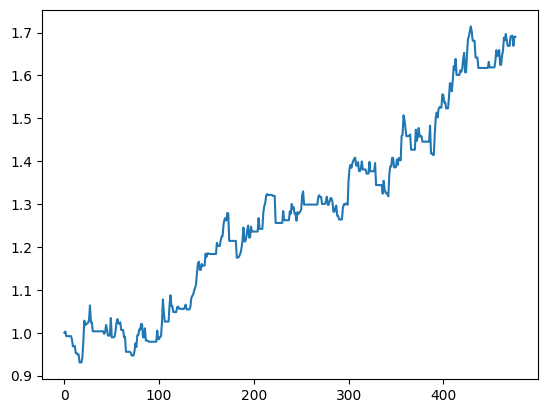

In [30]:
plt.plot(back_test.totals)